                                            OCD PATIENT DATA ANALYSIS

In [1]:
import pandas as pd  # For Data Manipulation and analysis

In [2]:
import numpy as np # Fundamental package for Numerical computing

In [3]:
import matplotlib.pyplot as plt # For Data Visualisation 

In [4]:
import seaborn as sns #Provide high-level interface for drawing statiscal graphics

In [5]:
from sklearn.preprocessing import LabelEncoder # For predictive data analysisi

In [6]:
from scipy import stats # For Scientific and Technical computing

In [7]:
from scipy.stats import pearsonr

In [8]:
import statsmodels.api as sm                          # For statistical analysis, hypothesis testing and modeling. 
from statsmodels.formula.api import ols               # ols fuunction is used to fit Ordeinary Least Squares (OLS) regression models.
from statsmodels.stats.multicomp import pairwise_tukeyhsd # It compares the means of multiple groups and provide confidence intervals for the differece in mean, along with significance level

In [9]:
#Reading the data file 
df_patient=pd.read_csv("OCD Patient Dataset.csv")

In [10]:
#first few rows of dataset
df_patient.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [11]:
#Summery of the dataset
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [12]:
#Date variable in Object format converting that to 'DateTime'
df_patient['OCD Diagnosis Date']=pd.to_datetime(df_patient['OCD Diagnosis Date'])

In [13]:
#Finding total missing values
df_patient.isnull().sum()

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64

In [14]:
#Dropping the "Marital Status" column
#Analysis revealed that "Marital Status" has no significant correlation
#with the OCD outcomes as determined by preliminary statistical tests
#(e.g. correlation coefficients and p-values were not statistically significant)

#Keeping this variable in the dataset would unnecessarilly complicate the analysison,
#So it will be removed to focus more influential factors related to OCD

df_patient.drop(columns=["Marital Status"])

,Patient ID,Age,Gender,Ethnicity,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,5013,19,Female,Hispanic,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,6089,40,Male,Asian,Some College,2018-03-13,100,NaN,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,3808,37,Female,Caucasian,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine


In [15]:
#Previous Diagnoses and Medications are having more missing values.
#Create indicators for missing values before imputation
df_patient["Previous Diagnosis Missing"]=df_patient["Previous Diagnoses"].isnull().astype(int)
df_patient["Medications Missing"]=df_patient["Medications"].isnull().astype(int)

#Fill missing values with mode as both are categorical data
mode_medications=df_patient["Previous Diagnoses"].mode()[0]
df_patient.fillna({"Previous Diagnoses": "Not Diagnosed"},inplace=True)

mode_medications=df_patient["Medications"].mode()[0]
df_patient.fillna({"Medications": mode_medications},inplace=True)

#Apply one-hot encoding to the categorical variables
df_patient_encoded=pd.get_dummies(df_patient,columns=["Previous Diagnoses","Medications"],drop_first=True)

In [16]:
#Statistical summery of numerical columns
df_patient.describe()

,Patient ID,Age,OCD Diagnosis Date,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Previous Diagnosis Missing,Medications Missing
count,1500.000000,1500.000000,1500,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000
mean,5541.254000,46.781333,2018-05-11 02:33:36,121.745333,20.048000,19.62600,0.165333,0.257333
min,1017.000000,18.000000,2013-11-13 00:00:00,6.000000,0.000000,0.00000,0.000000,0.000000
25%,3338.000000,32.000000,2016-03-16 00:00:00,64.000000,10.000000,9.00000,0.000000,0.000000
50%,5539.500000,47.000000,2018-05-11 00:00:00,121.000000,20.000000,20.00000,0.000000,0.000000
75%,7745.500000,61.000000,2020-06-18 12:00:00,178.000000,31.000000,29.00000,0.000000,1.000000
max,9995.000000,75.000000,2022-11-09 00:00:00,240.000000,40.000000,40.00000,1.000000,1.000000
std,2562.389469,16.830321,NaN,67.404610,11.823884,11.78287,0.371605,0.437310


In [17]:
#Statistical summery of categorical columns
df_patient.describe(include=["object","category"])

,Gender,Ethnicity,Marital Status,Education Level,Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Depression Diagnosis,Anxiety Diagnosis,Medications
count,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
unique,2,4,3,4,5,2,5,5,2,2,3
top,Male,Caucasian,Single,Some College,MDD,Yes,Harm-related,Washing,Yes,Yes,Benzodiazepine
freq,753,398,511,394,345,760,333,321,772,751,772


In [18]:
df_patient["Education Level"].unique()#'Some College', 'College Degree','Graduate Degree' all indicate attainment of graduate-level of education

array(['Some College', 'College Degree', 'High School', 'Graduate Degree'],
      dtype=object)

In [19]:
#Function to convert various values of degree graduate into single value "Graduate"
def graduate(degree):
    if degree=="Some College" or degree=="College Degree" or degree=="Graduate Degree":
        return "Degree Graduate"
    return degree
#Apply the graduate function to the 'Education Level' column in the predefined values
df_patient["Education Level"]=df_patient["Education Level"].apply(graduate)
df_patient["Education Level"].unique()
        

array(['Degree Graduate', 'High School'], dtype=object)

In [21]:
#Creating age groups for the OCD dataset to simplify analysis, mitigate outliers,
#and capture developmental difference in OCD presentation among age range

#Define age bins and labels
bins=[17,23,28,33,38,43,48,53,58,63,68,73,78,100]
labels=["17-23","23-28","28-33","33-38","38-43","43-48","48-53","53-58","58-63","63-68","68-73","73-78","78+"]

#Create Age Group for obsessions and Compulsion analysis
df_patient["Age Group"]=pd.cut(df_patient["Age"],bins=bins,labels=labels)



In [22]:
#Few rows of dataset after Cleaning
df_patient.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Previous Diagnosis Missing,Medications Missing,Age Group
0,1018,32,Female,African,Single,Degree Graduate,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI,0,0,28-33
1,2406,69,Male,African,Divorced,Degree Graduate,2017-04-28,180,Not Diagnosed,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI,1,0,68-73
2,1188,57,Male,Hispanic,Divorced,Degree Graduate,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine,0,0,53-58
3,6200,27,Female,Hispanic,Married,Degree Graduate,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI,0,0,23-28
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,Benzodiazepine,0,1,53-58


                                              VISUALISING DEMOGRAFIC DATA

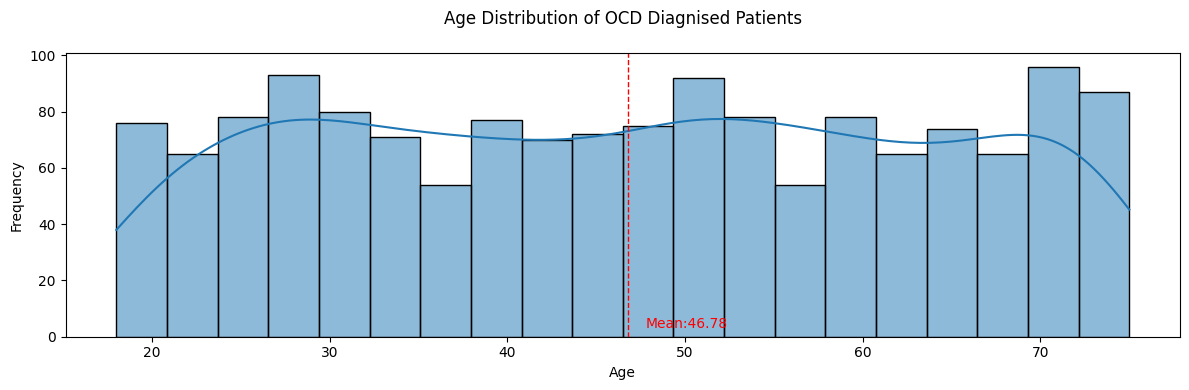

In [23]:
#Age Distribution

#Plot a graph to shows the age distribution of OCD patients 
plt.figure(figsize=[12,4])
sns.histplot(df_patient["Age"],kde=True,bins=20)

#Draw a vertical line of mean age
mean_age=df_patient.Age.mean()
plt.axvline(mean_age,color="Red",linestyle="dashed",linewidth=1) #Mark the mean in the graph 
plt.text(mean_age+1,3,f'Mean:{mean_age:.2f}',color='red')

plt.title("Age Distribution of OCD Diagnised Patients\n")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

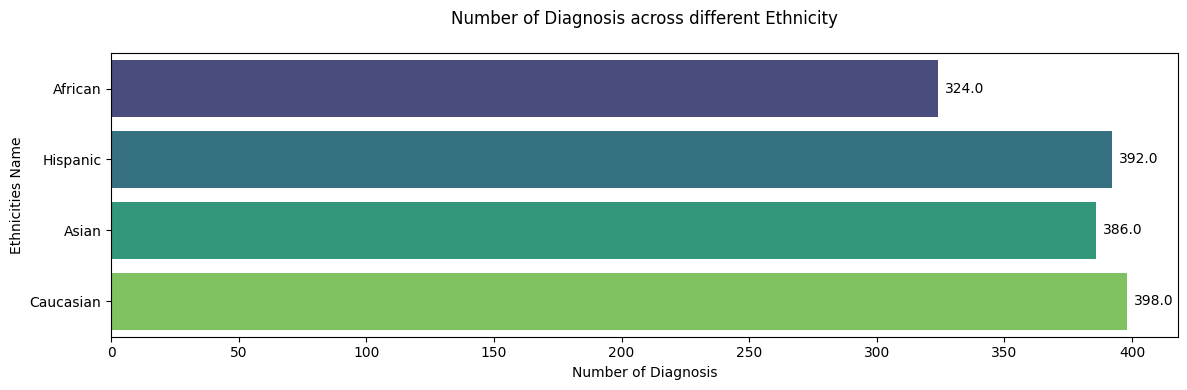

In [24]:
#Create graph that shows Ethnicity Distribution
plt.figure(figsize=(12,4))
ax=sns.countplot(y="Ethnicity",data=df_patient,palette='viridis',hue='Ethnicity')

#Annotate with counts to the right of each bar
for p in ax.patches:  # Loop through the bars
    ax.annotate(f'{p.get_width()}',  # Width of the bar (count)
                (p.get_width(), p.get_y() + p.get_height() / 2.),  # Position (x, y)
                ha='left', va='center',  # Horizontal and vertical alignment
                fontsize=10, color='black',  # Font size and color
                xytext=(5, 0),  # Adjust the label position
                textcoords='offset points')  # Offset points


plt.title("Number of Diagnosis across different Ethnicity\n")
plt.xlabel("Number of Diagnosis")
plt.ylabel("Ethnicities Name")
plt.tight_layout()
plt.show()

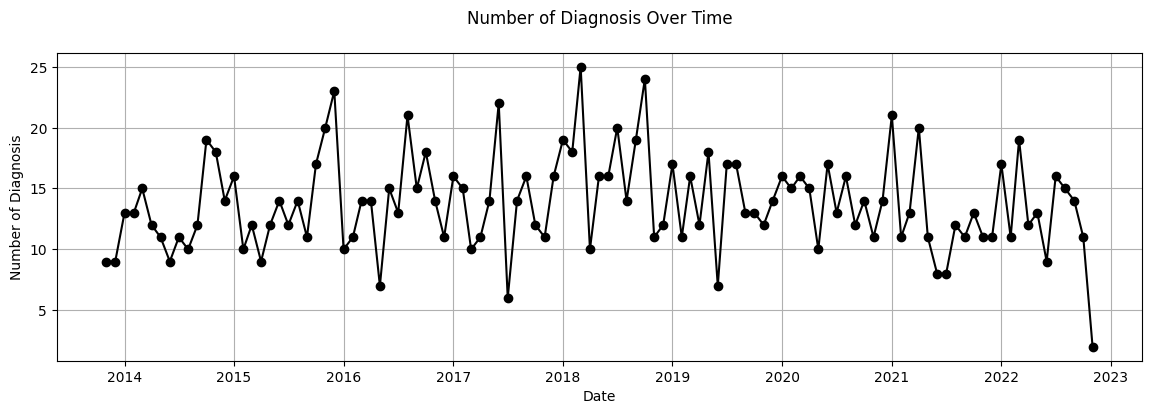

In [25]:
#Grouping Data by Diagnosis Year and Month
monthly_counts=df_patient.groupby(df_patient['OCD Diagnosis Date'].dt.to_period('M')).size()

# Convert to a more suitable format for plotting
monthly_counts.index = monthly_counts.index.to_timestamp()  # Convert PeriodIndex to Timestamp
monthly_counts = monthly_counts.reset_index(name='Count')  # Reset index to have DataFrame format

#Plotting a graph 
plt.figure(figsize=(14,4))
plt.plot(monthly_counts["OCD Diagnosis Date"],monthly_counts["Count"],color="black",marker="o")
plt.title("Number of Diagnosis Over Time\n")
plt.xlabel("Date")
plt.ylabel("Number of Diagnosis")
plt.grid()
#plt.xticks(df_patient["OCD Diagnosis Date"].dt.year)
plt.show()

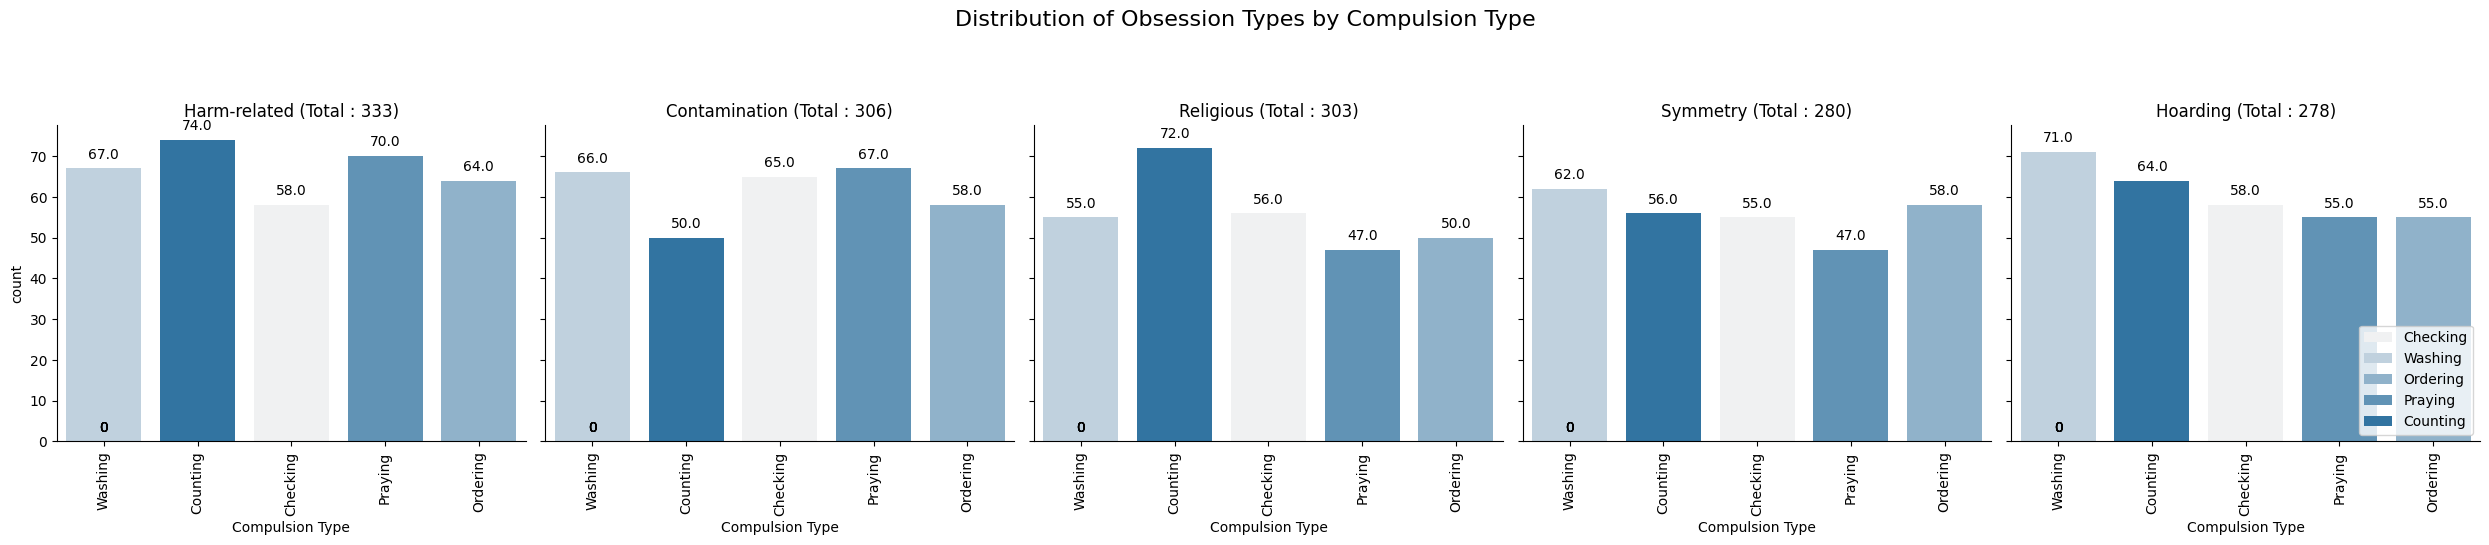

In [26]:
#Create a facet grid
com_type = sns.FacetGrid(df_patient, col='Obsession Type', col_wrap=5, height=5)

#Map to count plot
com_type.map(sns.countplot, 'Compulsion Type', order=df_patient['Compulsion Type'].value_counts().index,hue=df_patient['Compulsion Type'],palette='light:#1f77b4')

for ax in com_type.axes.flatten():  # Loop through each axis
    for p in ax.patches:  # Loop through the bars
        ax.annotate(f'{p.get_height()}',  # Height of the bar (count)
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position (x, y)
                    ha='center', va='bottom',  # Horizontal and vertical alignment
                    fontsize=10, color='black',  # Font size and color
                    xytext=(0, 5),  # Adjust the label position
                    textcoords='offset points')  # Offset points

#set axis label and title 
com_type.set_axis_labels("Compulsion Type")
com_type.set_xticklabels(rotation=90,label=df_patient["Compulsion Type"])
com_type.set_titles(col_template='{col_name}')

#Update subplot total obsession counts
total_count=df_patient["Obsession Type"].value_counts()

#Update subplot titles to include obsession counts
for ax, obs_type in zip(com_type.axes.flatten(),total_count.index):
    count=total_count[obs_type]
    ax.set_title(f"{obs_type} (Total : {count})")
com_type.fig.suptitle('Distribution of Obsession Types by Compulsion Type\n\n', fontsize=16)

plt.legend()
com_type.fig.subplots_adjust(top=0.75)
plt.show()

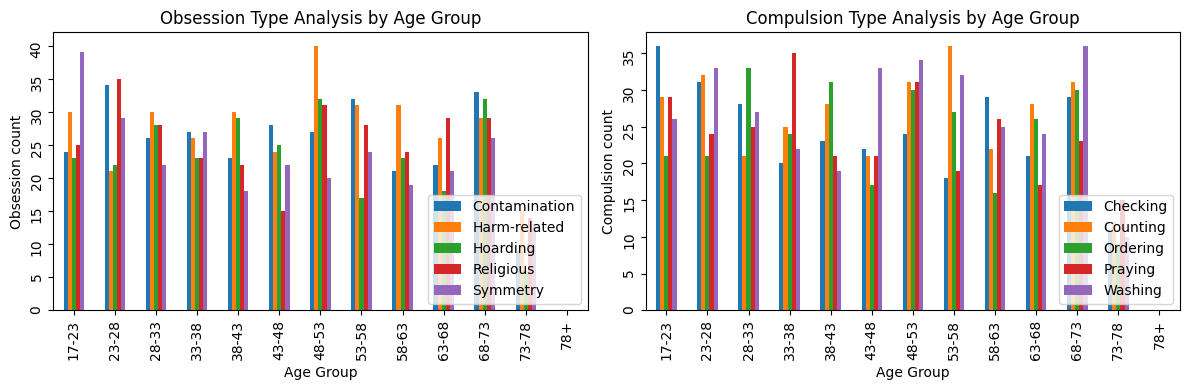

In [28]:
#Grouping Obsession Type by Age Groups
Obsession_counts=df_patient.groupby(["Age Group","Obsession Type"],observed=False).size().unstack(fill_value=0)

#Creating subplot
fig,axs=plt.subplots(1,2,figsize=(12,4))

#Plot a Graph for Obsession Type
Obsession_counts.plot(kind="bar",ax=axs[0])
axs[0].legend(loc="lower right")
axs[0].set_title("Obsession Type Analysis by Age Group")
axs[0].set_xlabel("Age Group")
axs[0].set_ylabel("Obsession count")
axs[0].tick_params(rotation=90)

#Grouping Compulsion Type by Age Group
Compulsion_counts=df_patient.groupby(["Age Group","Compulsion Type"],observed=False).size().unstack(fill_value=0)

#Plot a Graph for Compulsion Type
Compulsion_counts.plot(kind="bar",ax=axs[1])
axs[1].legend(loc="lower right")
axs[1].set_title("Compulsion Type Analysis by Age Group")
axs[1].set_xlabel("Age Group")
axs[1].set_ylabel("Compulsion count")
axs[1].tick_params(rotation=90)

plt.tight_layout()
plt.show()



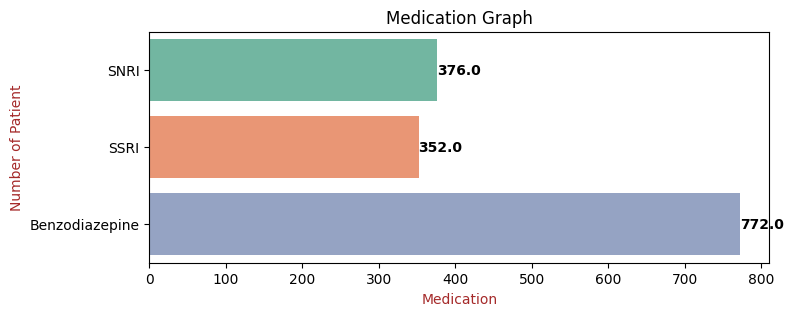

In [29]:
#Visualization of Medication Data
plt.figure(figsize=(8,3))
ax=sns.countplot(data=df_patient,y=df_patient["Medications"],palette="Set2",hue="Medications",legend=False)

#Adding counnt of each bar inside the plot
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(),p.get_y()+p.get_height()/2),
                ha='left',
                va='center',
                color='black',
                fontsize=10,
                weight='bold'
               )

plt.title("Medication Graph")
plt.xlabel("Medication",color="Brown")
plt.ylabel("Number of Patient",color="Brown")
plt.show()


                                        CLINICAL DATA ANALYSIS

In [30]:
#Create a table to display the 
gender_dist=df_patient.groupby(["Gender","Education Level"],as_index=False).agg(
    Diagnosis_Count=("Education Level","size"),
    Avg_Age=("Age","mean"),
    Mean_Duration_of_Symptoms_months=("Duration of Symptoms (months)","mean"),
    Mean_Y_BOCS_Score_Obsession=("Y-BOCS Score (Obsessions)","mean"),
    Mean_Y_BOCS_Score_compulsion=("Y-BOCS Score (Compulsions)","mean")
)

 
gender_dist.style.format({
    'Avg_Age':'{:,.2f}',
    'Mean_Duration_of_Symptoms_months':'{:,.2f}',
    'Mean_Y_BOCS_Score_Obsession':'{:,.2f}',
    'Mean_Y_BOCS_Score_compulsion':'{:,.2f}'
}).set_table_attributes('style="font-size: 14px; border-collapse: collapse;"').set_table_styles(
    [{'selector': 'th', 'props': [('background-color', 'lightblue'), ('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
)


,Gender,Education Level,Diagnosis_Count,Avg_Age,Mean_Duration_of_Symptoms_months,Mean_Y_BOCS_Score_Obsession,Mean_Y_BOCS_Score_compulsion
0,Female,Degree Graduate,565,47.21,121.45,19.93,19.47
1,Female,High School,182,46.07,119.65,21.01,20.00
2,Male,Degree Graduate,571,46.98,122.47,19.81,19.71
3,Male,High School,182,45.52,122.48,20.19,19.47


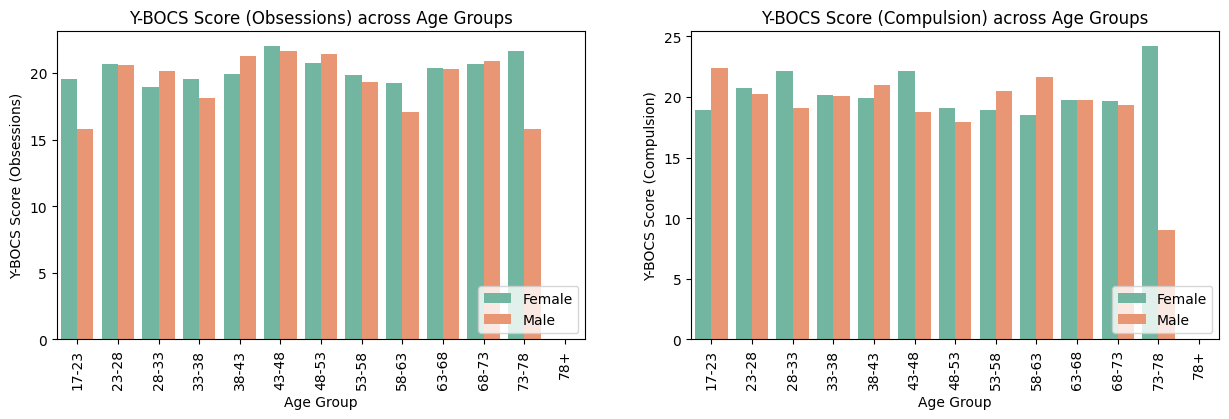

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [31]:
#Grouping patient Age and Gender 

age_analysis=df_patient.groupby(["Age","Gender"], as_index=False).agg(
    Avg_Y_BOCS_Score_Obsession=("Y-BOCS Score (Obsessions)","mean"),
    Avg_Y_BOCS_Score_Compulsion=("Y-BOCS Score (Compulsions)","mean")

)

#Add Age Group column for obsessions and Compulsion analysis
age_analysis["Age Group"]=df_patient["Age Group"]


#Create Subplot
fig,axs=plt.subplots(1,2,figsize=(15,4))

#plotting a graph to represent the Y-BOCS Score (Obsessions) variation over age and Education level
plt.figure(figsize=(12,4))
sns.barplot(data=age_analysis,x="Age Group",y="Avg_Y_BOCS_Score_Obsession",hue="Gender",palette="Set2",errorbar=None,ax=axs[0])
axs[0].set_title("Y-BOCS Score (Obsessions) across Age Groups")
axs[0].set_xlabel("Age Group")
axs[0].set_ylabel("Y-BOCS Score (Obsessions)")
axs[0].tick_params(axis='x',rotation=90)
axs[0].legend(loc="lower right")

#plotting a graph to represent the Y-BOCS Score (Obsessions) variation over age and Education level
plt.figure(figsize=(12,4))
sns.barplot(data=age_analysis,x="Age Group",y="Avg_Y_BOCS_Score_Compulsion",hue="Gender",palette="Set2",errorbar=None,ax=axs[1])
axs[1].set_title("Y-BOCS Score (Compulsion) across Age Groups")
axs[1].set_xlabel("Age Group")
axs[1].set_ylabel("Y-BOCS Score (Compulsion)")
axs[1].tick_params(axis='x',rotation=90)
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [32]:
#Define age bins and labels
bins=[17,23,28,33,38,43,48,53,58,63,68,73,100]
labels=["17-23","23-28","28-33","33-38","38-43","43-48","48-53","53-58","58-63","63-68","68-73","70+"]

#Create Age Group for obsessions and Compulsion analysis
df_patient["Age Group"]=pd.cut(age_analysis["Age"],bins=bins,labels=labels)


#Perform ANOVA for Y-BOCS Score Obsession by Age
model_age_gender=ols('Q("Y-BOCS Score (Obsessions)")~Q("Age Group")', data=df_patient).fit()
annova_table_age_gender=sm.stats.anova_lm(model_age_gender,type=2)
print(annova_table_age_gender)


                   df        sum_sq     mean_sq         F    PR(>F)
Q("Age Group")   11.0   1561.245402  141.931400  0.979333  0.469936
Residual        104.0  15072.366667  144.926603       NaN       NaN


In [33]:
#Perform ANOVA for Y-BOCS Score Compulsions by Age
print("Result of ANOVA Test for Compulsions Score:\n")
model_age=ols('Q("Y-BOCS Score (Compulsions)")~Q("Age Group")', data=df_patient).fit()
annova_table_age=sm.stats.anova_lm(model_age,typ=2)
print(annova_table_age)


Result of ANOVA Test for Compulsions Score:

                      sum_sq     df         F   PR(>F)
Q("Age Group")   1084.140230   11.0  0.652451  0.77968
Residual        15710.066667  104.0       NaN      NaN


In [34]:
#Grouping data by Ethnicity  
ethnicity_dist=df_patient.groupby("Ethnicity",as_index=False).agg(
    Ethnicity_count=("Ethnicity","size"),
    Avg_Age=("Age","mean"),
    Mean_Duration_symptoms_months=("Duration of Symptoms (months)","mean"),
    Mean_Y_BOCS_Score_Obsession=("Y-BOCS Score (Obsessions)","mean"),
    Mean_Y_BOCS_Score_Compulsion=("Y-BOCS Score (Compulsions)","mean")
)

#Sorting data by Ethnicity count 
ethnicity_dist.sort_values(by="Ethnicity_count",ascending=False)

#Styling the table
ethnicity_dist.style.format({
    'Avg_Age':'{:,.2f}',
    'Mean_Duration_symptoms_months':'{:,.2f}',
    'Mean_Y_BOCS_Score_Obsession':'{:,.2f}',
    'Mean_Y_BOCS_Score_Compulsion':'{:,.2f}'
}).set_table_attributes('style="font-size: 14px; border-collapse: collapse;"').set_table_styles(
    [{'selector': 'th', 'props': [('background-color', 'lightblue'), ('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
)

,Ethnicity,Ethnicity_count,Avg_Age,Mean_Duration_symptoms_months,Mean_Y_BOCS_Score_Obsession,Mean_Y_BOCS_Score_Compulsion
0,African,324,46.16,122.15,19.76,18.99
1,Asian,386,46.64,122.34,20.32,19.34
2,Caucasian,398,46.96,120.56,19.79,19.53
3,Hispanic,392,47.26,122.03,20.28,20.53


In [35]:
#perform the ANOVA for Obsession Score
print("Result of ANOVA Test for Obsession Score:\n")
model_obs=ols('Q("Y-BOCS Score (Obsessions)")~C(Ethnicity) + Q("Age Group")', data=df_patient).fit()
annova_table_obs=sm.stats.anova_lm(model_obs,typ=2)
print(annova_table_obs,"\n\n\n")

#Perform the ANOVA for Compulsion Score
print("Result of ANOVA Test for Compulsion Score:\n")
model_com=ols('Q("Y-BOCS Score (Compulsions)")~C(Ethnicity) + Q("Age Group")', data=df_patient).fit()
annova_table_com=sm.stats.anova_lm(model_com,typ=2)
print(annova_table_com)

Result of ANOVA Test for Obsession Score:

                      sum_sq     df         F    PR(>F)
C(Ethnicity)       71.792753    3.0  0.161129  0.922259
Q("Age Group")   1422.904560   11.0  0.870957  0.570939
Residual        15000.573914  101.0       NaN       NaN 



Result of ANOVA Test for Compulsion Score:

                      sum_sq     df         F    PR(>F)
C(Ethnicity)      790.104245    3.0  1.782858  0.155220
Q("Age Group")   1117.784846   11.0  0.687890  0.747184
Residual        14919.962422  101.0       NaN       NaN


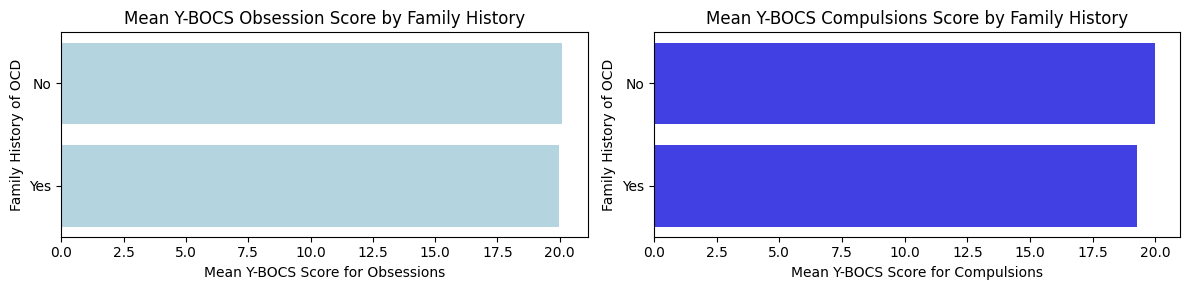

In [36]:
#Calculate the mean Y-BOCS Score of Obsessions based on family History
family_analysis=df_patient.groupby("Family History of OCD").agg(
    count=("Family History of OCD","size") ,
    y_bocs_obs_score=("Y-BOCS Score (Obsessions)","mean"),
    y_bocs_cpl_score=("Y-BOCS Score (Compulsions)","mean")
    
).reset_index()
family_analysis.columns=["Family History of OCD","Count","Mean Obsessions Score","Mean Compulsions Score"]

#Creating the subplots
fig,axs=plt.subplots(1,2,figsize=(12,3))

#Creating the bar plt for the Y-BOCS Score for obsessions  
sns.barplot(data=family_analysis,y="Family History of OCD",x="Mean Obsessions Score",color="lightblue",ax=axs[0])
axs[0].set_title("Mean Y-BOCS Obsession Score by Family History")
axs[0].set_xlabel("Mean Y-BOCS Score for Obsessions")

#Creating the bar plot for the 
sns.barplot(data=family_analysis,y="Family History of OCD",x="Mean Compulsions Score",color="blue",alpha=0.85,ax=axs[1])
axs[1].set_title("Mean Y-BOCS Compulsions Score by Family History")
axs[1].set_xlabel("Mean Y-BOCS Score for Compulsions")

plt.tight_layout()
plt.show()


In [37]:
#SPlitting data into two groups based family History for Y-BOCS Score (Obsession) 
grp_with_history=df_patient[df_patient["Family History of OCD"]=="Yes"]["Y-BOCS Score (Obsessions)"]
grp_without_history=df_patient[df_patient["Family History of OCD"]=="No"]["Y-BOCS Score (Obsessions)"]

#perform the t-test
t_stat,p_value=stats.ttest_ind(grp_with_history,grp_without_history)

#print the results
print("T-test Result:")
print(f"T-statistic:{t_stat}")
print(f"P-value:{p_value}")

#interpret the results
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference in Y-BOCS scores Obsessions between the two groups.")
else:
    print("Fail to reject the null hypothesis - There is no significance difference in the Y-BOCS score Obsessions")

T-test Result:
T-statistic:-0.19421740669751822
P-value:0.8460319873000419
Fail to reject the null hypothesis - There is no significance difference in the Y-BOCS score Obsessions


In [38]:
#SPlitting data into two groups based family History for Y-BOCS Score (Compulsions) 
grp_with_history=df_patient[df_patient["Family History of OCD"]=="Yes"]["Y-BOCS Score (Compulsions)"]
grp_without_history=df_patient[df_patient["Family History of OCD"]=="No"]["Y-BOCS Score (Compulsions)"]

#perform the t-test
t_stat,p_value=stats.ttest_ind(grp_with_history,grp_without_history)

#print the results
print("T-test Result:")
print(f"T-statistic:{t_stat}")
print(f"P-value:{p_value}")

#interpret the results
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference in Y-BOCS scores of Compulsions between the two groups.")
else:
    print("Fail to reject the null hypothesis - There is no significance difference in the Y-BOCS score of Compulsions")

T-test Result:
T-statistic:-1.1518037057601531
P-value:0.24958553469023995
Fail to reject the null hypothesis - There is no significance difference in the Y-BOCS score of Compulsions


In [ ]:
#Grouping the dataset by Previous Diagnoses
previous_diagnoses=df_patient.groupby("Previous Diagnoses").agg(
    Y_BOCS_Score_Obsession=("Y-BOCS Score (Obsessions)","mean"),
    Y_BOCS_Score_Compulsion=("Y-BOCS Score (Compulsions)","mean")
).reset_index()

#Creating a dataframe to previous diagnosis
df_previous_diagnoses=pd.DataFrame(previous_diagnoses)

#Creating a sub plot
fig,axs=plt.subplots(1,2,figsize=(12,5))


# Define unique diagnoses and corresponding colors
diagnoses = df_previous_diagnoses["Previous Diagnoses"].unique()
colors = sns.color_palette("Set2", n_colors=len(diagnoses))

#Creating Plot for Y-BOCS Score for Obsession
sns.barplot(data=df_previous_diagnoses, x="Previous Diagnoses",y="Y_BOCS_Score_Obsession", palette=colors,hue="Previous Diagnoses",ax=axs[0])
axs[0].set_title("Variation of Y-BOCS Score (Obsessions) \nby Previous Diagnoses")
axs[0].set_xlabel("Previous Diagnoses")
axs[0].set_ylabel("Y-BOCS Score (Obsessions)")
axs[0].tick_params(axis='x',rotation=90)

#Add legend to Plot
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
axs[0].legend(handles, diagnoses, title="Previous Diagnoses", bbox_to_anchor=(1.05, 1), loc='upper left')

#Creating Plot for Y-BOCS Score for Compulsion
sns.barplot(data=df_previous_diagnoses, x="Previous Diagnoses",y="Y_BOCS_Score_Compulsion", palette=colors,hue="Previous Diagnoses",ax=axs[1],legend=False)
axs[1].set_title("Variation of Y-BOCS Score (Compulsions) \nby Previous Diagnoses")
axs[1].set_xlabel("Previous Diagnoses")
axs[1].set_ylabel("Y-BOCS Score (Compulsions)")
axs[1].tick_params(axis='x',rotation=90)


plt.tight_layout()
plt.show()

In [ ]:
#Splitting data into two groups based family History for Y-BOCS Score (Obsessions) 
grp_with_history=df_patient[df_patient["Previous Diagnosis Missing"]==0]["Y-BOCS Score (Obsessions)"]
grp_without_history=df_patient[df_patient["Previous Diagnosis Missing"]==1]["Y-BOCS Score (Obsessions)"]

#perform the t-test
t_stat,p_value=stats.ttest_ind(grp_with_history,grp_without_history)

#print the results
print("T-test Result:")
print(f"T-statistic:{t_stat}")
print(f"P-value:{p_value}")

#interpret the results
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference in Y-BOCS scores of Obsessions between the two groups.")
else:
    print("Fail to reject the null hypothesis - There is no significance difference in the Y-BOCS score of Obsessions")

In [ ]:
#Splitting data into two groups based family History for Y-BOCS Score (Compulsions) 
grp_with_history=df_patient[df_patient["Previous Diagnosis Missing"]==0]["Y-BOCS Score (Compulsions)"]
grp_without_history=df_patient[df_patient["Previous Diagnosis Missing"]==1]["Y-BOCS Score (Compulsions)"]

#perform the t-test
t_stat,p_value=stats.ttest_ind(grp_with_history,grp_without_history)

#print the results
print("T-test Result:")
print(f"T-statistic:{t_stat}")
print(f"P-value:{p_value}")

#interpret the results
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference in Y-BOCS scores of Compulsions between the two groups.")
else:
    print("Fail to reject the null hypothesis - There is no significance difference in the Y-BOCS score of Compulsions")

In [ ]:
df_patient.head()

In [ ]:
#Group the Obsession Type for finding Y-BOCS Score mean
Obs_type=df_patient.groupby("Obsession Type").agg(
    Y_BOCS_Score_Obs=("Y-BOCS Score (Obsessions)","mean")
).reset_index()

#Group the Compulsion Type for finding Y-BOCS Score mean
Com_type=df_patient.groupby("Compulsion Type").agg(
    Y_BOCS_Score_Com=("Y-BOCS Score (Compulsions)","mean")
).reset_index()

#Create a subplot
fig,axs=plt.subplots(1,2,figsize=(12,4))

#Plot box graph for the Obsession Y-BOCS Score.
sns.barplot(data=Obs_type, y="Obsession Type",x="Y_BOCS_Score_Obs",palette='Set1',hue="Obsession Type",ax=axs[0])
axs[0].set_title("Variation of Y-BOCS Score by Obsession Types\n")
axs[0].set_xlabel("Mean Y-BOCS Score")

#Plot box graph for the Compulsion Y-BOCS Score.
sns.barplot(data=Com_type, y="Compulsion Type",x="Y_BOCS_Score_Com",palette='Set1',hue="Compulsion Type",ax=axs[1])
axs[1].set_title("Variation of Y-BOCS Score by Compulsion Types\n")
axs[1].set_xlabel("Mean Y-BOCS Score")

plt.tight_layout()
plt.show()


In [ ]:
#perform the ANOVA for Obsession Score
print("Result of ANOVA Test for Obsession Score:\n")
model_obs=ols('Q("Y-BOCS Score (Obsessions)") ~ Q("Obsession Type")', data=df_patient).fit()
annova_table_obs=sm.stats.anova_lm(model_obs,typ=2)
print(annova_table_obs,"\n\n\n")

#Perform the ANOVA for Compulsion Score
print("Result of ANOVA Test for Compulsion Score:\n")
model_com=ols('Q("Y-BOCS Score (Compulsions)") ~ Q("Compulsion Type")', data=df_patient).fit()
annova_table_com=sm.stats.anova_lm(model_com,typ=2)
print(annova_table_com)

In [ ]:
#Performing Post Hoc Testing

#For Compulsion Score
print("\nResult of Post Hoc Testing for Compulsion Score:\n")
tukey_results_com = pairwise_tukeyhsd(endog=df_patient['Y-BOCS Score (Compulsions)'], groups=df_patient['Compulsion Type'], alpha=0.05)
print(tukey_results_com)

                                    CORRELATION ANALYSIS OF DIFFERENT CLINICAL DATA

In [ ]:
#Convert Categorical Variable to binary
df_patient['Anxiety Diagnosis binary']=df_patient["Anxiety Diagnosis"].apply(lambda x: 1 if x=='Yes' else 0)
df_patient['Depression Diagnosis binary']=df_patient["Depression Diagnosis"].apply(lambda x: 1 if x=='Yes' else 0)

#Selecting Relavant columns for analysis
relavant_columns=[
    'Y-BOCS Score (Compulsions)',
    'Y-BOCS Score (Obsessions)',
    'Anxiety Diagnosis binary',
    'Depression Diagnosis binary',
    'Medications', #Categorical Data
    'Compulsion Type', #Categorical Data
    'Obsession Type', #Categorical Data
    'Previous Diagnoses' #Categorical Data
]

#Create a new DataFrame with relavant columns
df_relavant=df_patient[relavant_columns]

#One-hot encoding on the relavant Categorical data columns to convert it to numerical format
df_relavant=pd.get_dummies(df_relavant,columns=["Medications","Compulsion Type","Obsession Type","Previous Diagnoses"])


#Calculate Pearson correlation coefficients
corr=df_relavant.corr(method='spearman')

#Filter the correlation matrix for values >0.03 and <-0.03
mask=(corr>0.05) | (corr<-0.05)
filtered_corr= corr[mask]

#Plot the heatmap for the filtered correlation matrix
plt.figure(figsize=(20,14))
sns.heatmap(filtered_corr, annot=True, fmt='.3f', cmap='coolwarm', square=True, mask=filtered_corr.isnull())

#sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm',square=True)
plt.title("Correlation Heatmap of Clinical Factors and Compulsion Scores\n")
plt.show()